# Evaluating an equally-weighted portfilio's performance

## How to do it

### 1. Import the libraries

In [307]:
import yfinance as yf
import numpy as np
import pandas as pd
import quantstats as qs

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Define the considered assets and download their prices from Yahoo Finance

[*********************100%***********************]  5 of 5 completed


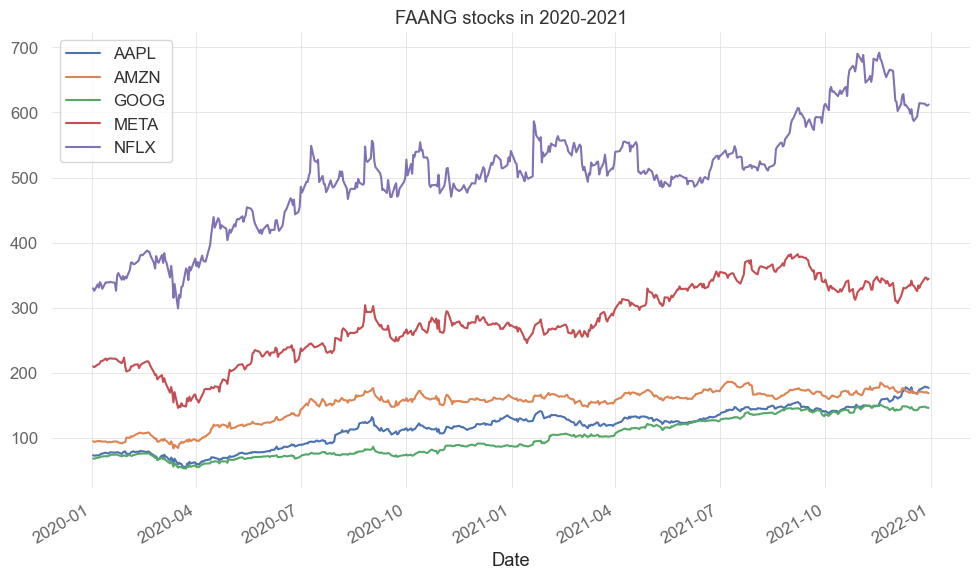

In [308]:
ASSETS = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]
n_assets = len(ASSETS)

start_date = pd.Timestamp("2020-01-01")
end_date = pd.Timestamp("2021-12-31")

prices_df = yf.download(
    ASSETS,
    start=start_date,
    end=end_date,
)

prices_df['Adj Close'].plot(title="FAANG stocks in 2020-2021")

sns.despine()
plt.tight_layout()

### 3. Calculate individual returns

In [309]:
returns = prices_df['Adj Close'].pct_change().dropna()
returns.head()

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2020-01-03,-0.009722,-0.012139,-0.004907,-0.005291,-0.011855
2020-01-06,0.007968,0.014886,0.024657,0.018834,0.030469
2020-01-07,-0.004703,0.002092,-0.000624,0.002164,-0.015127
2020-01-08,0.016086,-0.007809,0.007880,0.010138,0.025729
2020-01-09,0.021241,0.004799,0.011044,0.014311,-0.010611


### 4. Define the weights

In [310]:
portfolio_weights = n_assets * [1 / n_assets]
portfolio_weights

[0.2, 0.2, 0.2, 0.2, 0.2]

### 5. Calculate the portfolio returns

In [311]:
portfolio_returns = pd.Series(
    np.dot(portfolio_weights, returns.T),
    index=returns.index
)
portfolio_returns

Date
2020-01-03   -0.008783
2020-01-06    0.019363
2020-01-07   -0.003240
2020-01-08    0.010405
2020-01-09    0.008157
                ...   
2021-12-23    0.003879
2021-12-27    0.010423
2021-12-28   -0.002931
2021-12-29   -0.003484
2021-12-30   -0.001323
Length: 503, dtype: float64

In [312]:
# portfolio_returns.index = portfolio_returns.index.tz_localize('UTC')
# portfolio_returns.index = portfolio_returns.index.tz_localize(None)
portfolio_returns.index

DatetimeIndex(['2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=503, freq=None)

In [313]:
portfolio_returns.index

DatetimeIndex(['2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=503, freq=None)

### 6. Generate basic performance evaluation plots

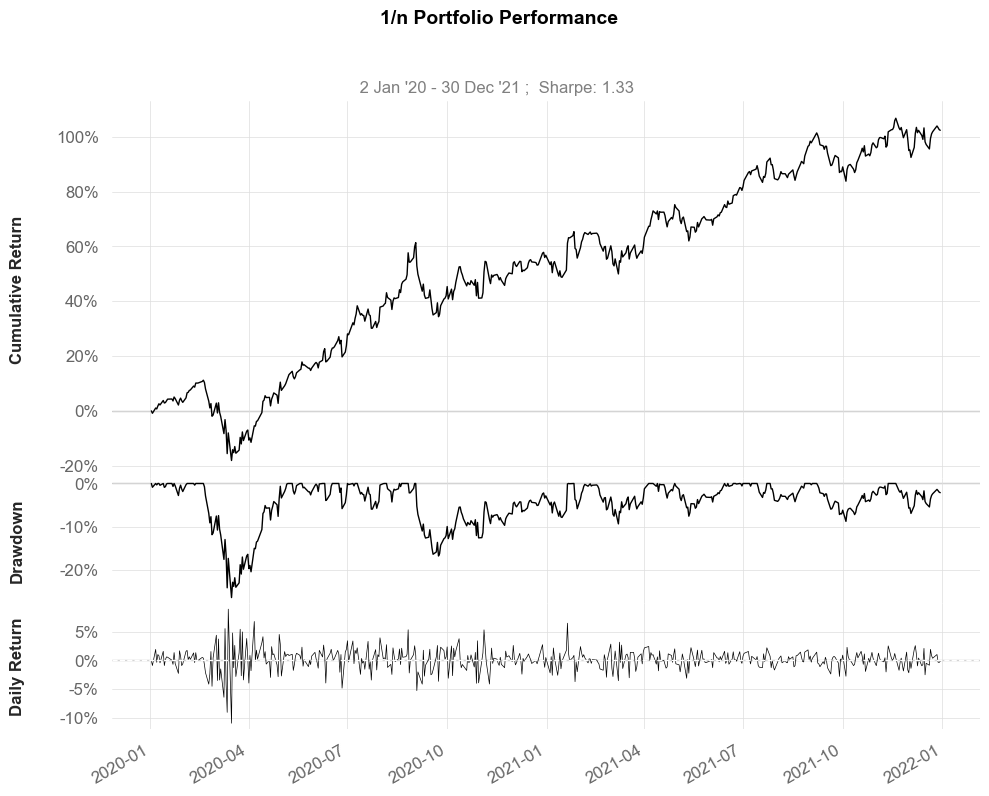

In [314]:
qs.plots.snapshot(portfolio_returns,
                  title='1/n Portfolio Performance',
                  grayscale=True)

### 7. Calculate the basic portfolio evaluation metrics 

In [315]:
qs.reports.metrics(portfolio_returns,
                #    benchmark='SPY',
                   mode='basic')

                    Strategy
------------------  ----------
Start Period        2020-01-03
End Period          2021-12-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   102.38%
CAGR﹪              42.47%

Sharpe              1.33
Prob. Sharpe Ratio  96.68%
Sortino             1.91
Sortino/√2          1.35
Omega               1.27

Max Drawdown        -26.35%
Longest DD Days     140

Gain/Pain Ratio     0.27
Gain/Pain (1M)      3.38

Payoff Ratio        0.9
Profit Factor       1.27
Common Sense Ratio  1.2
CPC Index           0.67
Tail Ratio          0.94
Outlier Win Ratio   4.22
Outlier Loss Ratio  3.17

MTD                 1.56%
3M                  7.96%
6M                  11.59%
YTD                 29.09%
1Y                  28.21%
3Y (ann.)           42.47%
5Y (ann.)           42.47%
10Y (ann.)          42.47%
All-time (ann.)     42.47%

Avg. Drawdown       -3.63%
Avg. Drawdown Days  18
Recovery Factor     3.89
Ulcer Index         0.06
Serenity Index      2.

## There's more

### 1. Generate the full HTML tear sheet

In [316]:
qs.reports.html(
    portfolio_returns,
    # benchmark='SPY',
    title='1/n portfolio',
    download_filename='EW portfolio evaluation.html'
)

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


### 2. Add the method of `qauntstats` of the `pandas` DataFrame

In [317]:
qs.extend_pandas()

### 3. Calculate the Sharpe ratio and the Sortino ratio using the newly added methods

In [318]:
print(f"Shape ratio: {portfolio_returns.sharpe():.2f}")
print(f"Sortino ratio: {portfolio_returns.sortino():.2f}")

Shape ratio: 1.33
Sortino ratio: 1.91


### 4. See all the new methods that are available to us thanks to the quantstats library

In [319]:
[method for method in dir(qs.stats) if method[0] != '_']

['adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',
 'rolling_sortino',
 'rolling_volatility',
 'ror',
 'seren

### 5. Generate the plots

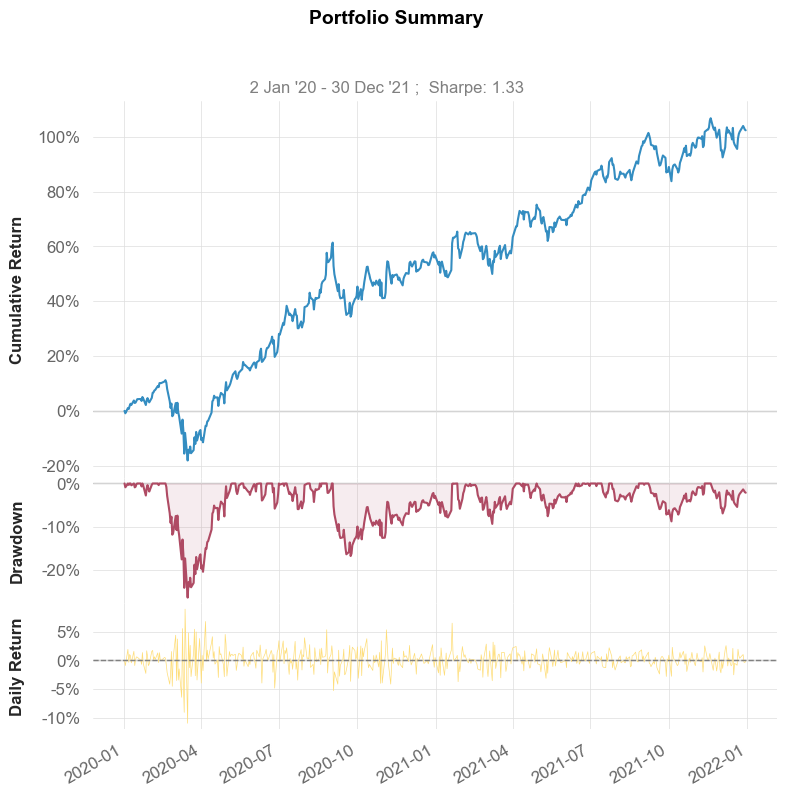

/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


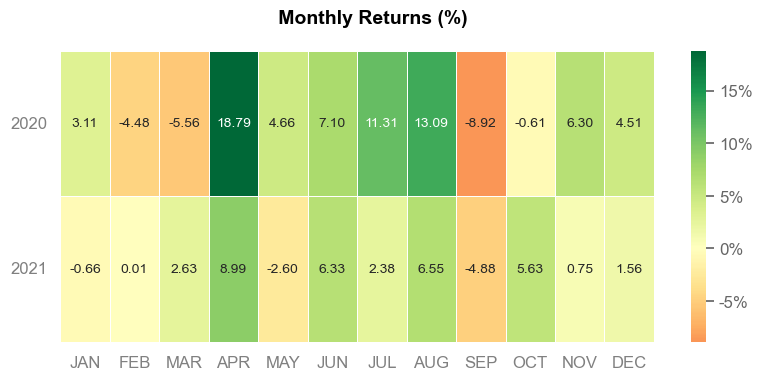

In [320]:
qs.reports.plots(
    portfolio_returns,
    benchmark='SPY',
    mode='basic',
    prepare_returns=False
)

In [321]:
help(portfolio_returns.value_at_risk)

Help on method value_at_risk in module quantstats.stats:

value_at_risk(sigma=1, confidence=0.95, prepare_returns=True) method of pandas.core.series.Series instance
    Calculats the daily value-at-risk
    (variance-covariance calculation with confidence n)



# Finding the efficient frontier using Monte Carlo simulations

## How to do it

### 1. Import the libraries

In [322]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Set up the parameters

In [323]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
ASSETS = ["META", "TSLA", "AMZN", "MSFT"]
ASSETS.sort()

n_assets = len(ASSETS)

### 3. Download the stock prices from Yahoo Finance

In [324]:
prices_df = yf.download(ASSETS,
                        start='2021-01-01',
                        end='2021-12-31')

[*********************100%***********************]  4 of 4 completed


In [325]:
prices_df.head()

Adj Close                                           Close  \
                  AMZN        META        MSFT        TSLA        AMZN   
Date                                                                     
2021-01-04  159.331497  268.940002  212.876648  243.256668  159.331497   
2021-01-05  160.925507  270.970001  213.082016  245.036667  160.925507   
2021-01-06  156.919006  263.309998  207.556931  251.993332  156.919006   
2021-01-07  158.108002  268.739990  213.463379  272.013336  158.108002   
2021-01-08  159.134995  267.570007  214.763977  293.339996  159.134995   

                                                      High              ...  \
                  META        MSFT        TSLA        AMZN        META  ...   
Date                                                                    ...   
2021-01-04  268.940002  217.690002  243.256668  163.600006  275.000000  ...   
2021-01-05  270.970001  217.899994  245.036667  161.169006  272.399994  ...   
2021-01-06  263.309998  212.250000  251.993332  159.875504  267.750000  ...   
2021-01-07  268.739990  218.289993  272.013336  160.427002  271.609985  ...   
2021-01-08  267.570007  219.619995  293.339996  159.531998  268.950012  ...   

                   Low                    Open                          \
                  MSFT        TSLA        AMZN        META        MSFT   
Date                                                                     
2021-01-04  214.809998  239.063339  163.500000  274.779999  222.529999   
2021-01-05  215.699997  239.733337  158.300507  268.290009  217.259995   
2021-01-06  211.940002  249.699997  157.324005  262.000000  212.169998   
2021-01-07  213.710007  258.399994  157.850006  265.899994  214.039993   
2021-01-08  217.029999  279.463318  159.000000  268.309998  218.679993   

                          Volume                                 
                  TSLA      AMZN      META      MSFT       TSLA  
Date                                                             
2021-01-04  239.820007  88228000  15106100  37130100  145914600  
2021-01-05  241.220001  53110000   9871600  23823000   96735600  
2021-01-06  252.830002  87896000  24354100  35930700  134100000  
2021-01-07  259.209991  70290000  15789800  27694500  154496700  
2021-01-08  285.333344  70754000  18528300  22956200  225166500  

[5 rows x 24 columns]

<Axes: title={'center': 'Selected stocks in 2021'}, xlabel='Date'>

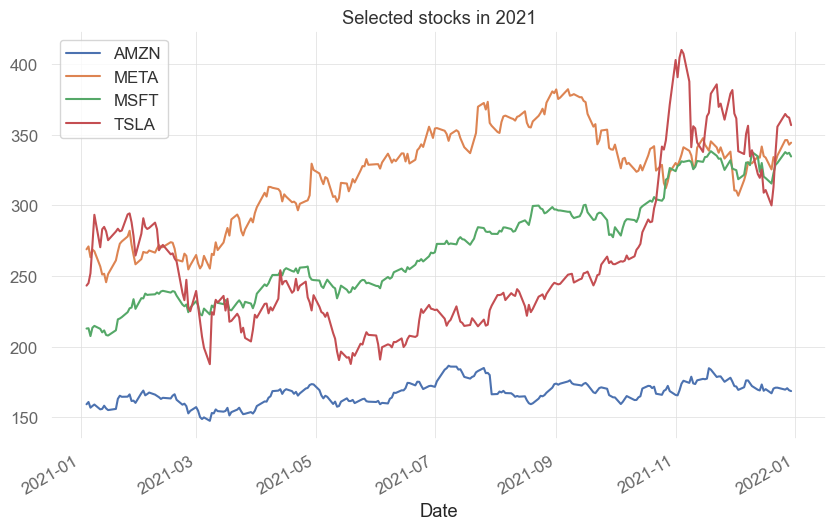

In [326]:
prices_df['Adj Close'].plot(title='Selected stocks in 2021')

### 5. Calculate annualized average returns and the corresponding standard deviation

In [327]:
returns_df = prices_df['Adj Close'].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

<Axes: title={'center': "Daily returns of the selected companies' stocks"}, xlabel='Date'>

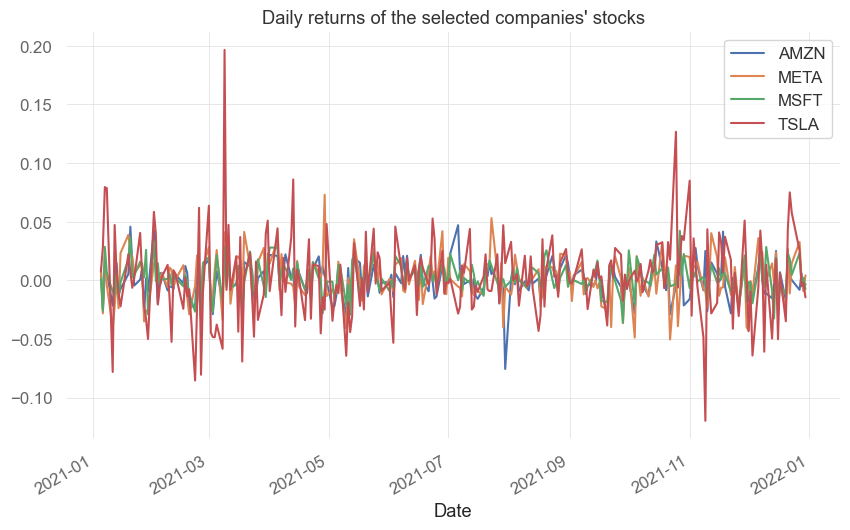

In [328]:
returns_df.plot(title="Daily returns of the selected companies' stocks")

### 5. Simulate random portfolio weights

In [329]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

### 6. Calculate the portfolio metrics

In [330]:
portf_rtns = np.dot(weights, avg_returns)

portf_vol = []
for i in range(0, len(weights)):
    vol = np.sqrt(
        np.dot(weights[i].T, np.dot(cov_mat, weights[i]))
    )
    portf_vol.append(vol)
portf_vol = np.array(portf_vol)

portf_sharpe_ratio = portf_rtns / portf_vol

### 7. Create a DataFrame containing all the data

In [331]:
portf_results_df = pd.DataFrame(
    {"returns": portf_rtns,
     "volatility": portf_vol,
     "sharpe_ratio": portf_sharpe_ratio}
)
portf_results_df

,returns,volatility,sharpe_ratio
0,0.369134,0.244636,1.508915
1,0.444584,0.414480,1.072633
2,0.342257,0.308296,1.110157
3,0.226116,0.224367,1.007793
4,0.349149,0.233694,1.494046
...,...,...,...
99995,0.363350,0.226064,1.607287
99996,0.384930,0.329892,1.166837
99997,0.318649,0.210354,1.514824
99998,0.362277,0.254780,1.421920


### 8. Locate the points creating the Efficient Frontier

In [332]:
N_POINTS = 100

ef_rtn_list = []
ef_vol_list = []

possible_ef_rtns = np.linspace(
    portf_results_df['returns'].min(),
    portf_results_df['returns'].max(),
    N_POINTS
)
possible_ef_rtns = np.round(possible_ef_rtns, 2)
portf_rtns = np.round(portf_rtns, 2)

for rtn in possible_ef_rtns:
    if rtn in portf_rtns:
        ef_rtn_list.append(rtn)
        matched_ind = np.where(portf_rtns == rtn)
        ef_vol_list.append(np.min(portf_vol[matched_ind]))

### 9. Plot the efficient Frontier

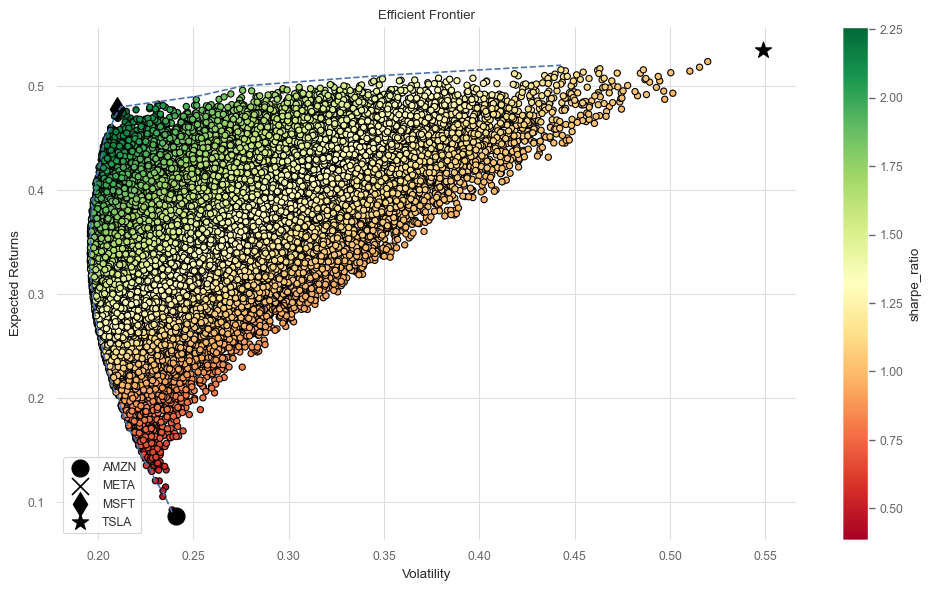

In [333]:
MARKERS = ["o", "x", "d", "*"]

with sns.plotting_context("paper"):
    fig, ax = plt.subplots()
    portf_results_df.plot(
        kind='scatter',
        x='volatility',
        y='returns',
        c='sharpe_ratio',
        cmap='RdYlGn',
        edgecolors='black',
        ax=ax
    )
    ax.set(xlabel='Volatility', 
           ylabel='Expected Returns',
           title='Efficient Frontier')
    ax.plot(ef_vol_list, ef_rtn_list, 'b--')
    for asset_index in range(n_assets):
        ax.scatter(
            x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
            y=avg_returns[asset_index],
            marker=MARKERS[asset_index],
            s=150, color='black',
            label=ASSETS[asset_index]
        )
    ax.legend()

    sns.despine()
    plt.tight_layout()

## There's more

In [334]:
%reload_ext autoreload
%autoreload 2
from asset_allocation_utils import print_portfolio_summary

In [335]:
max_sharpe_ind = np.argmax(portf_results_df["sharpe_ratio"])
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

min_vol_ind = np.argmin(portf_results_df["volatility"])
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [336]:
print_portfolio_summary(max_sharpe_portf,
                        weights[max_sharpe_ind],
                        ASSETS,
                        name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio ----
Performance
returns : 47.09% volatility : 20.86% sharpe_ratio : 225.78% 
Weights
AMZN : 0.71% META : 3.31% MSFT : 92.87% TSLA : 3.10% 

In [337]:
print_portfolio_summary(min_vol_portf,
                        weights[min_vol_ind],
                        ASSETS,
                        name="Minmum Volatility")

Minmum Volatility portfolio ----
Performance
returns : 33.89% volatility : 19.58% sharpe_ratio : 173.11% 
Weights
AMZN : 29.85% META : 12.00% MSFT : 58.15% TSLA : 0.01% 

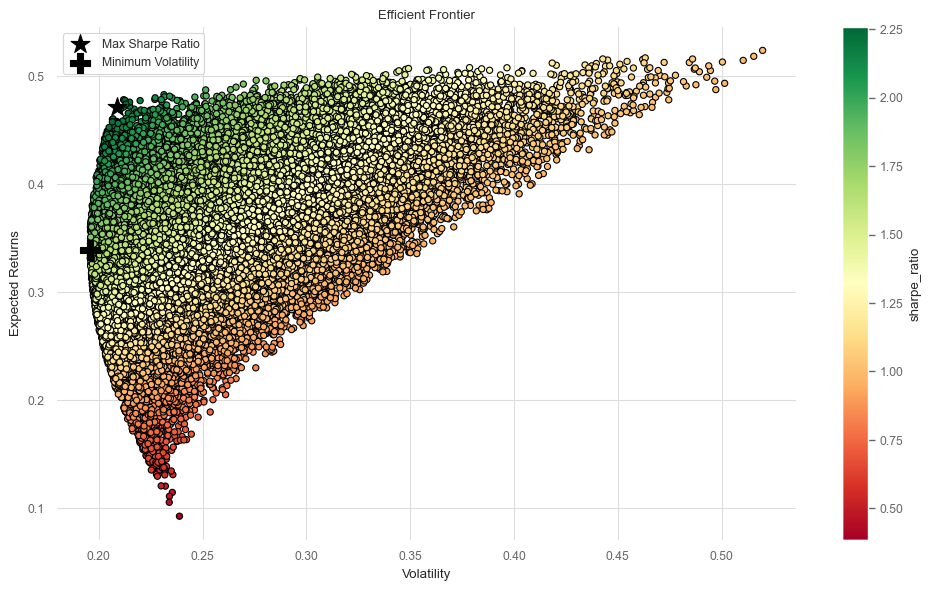

In [338]:
with sns.plotting_context("paper"):
    fig, ax = plt.subplots()
    portf_results_df.plot(
        kind="scatter",
        x="volatility",
        y="returns",
        c="sharpe_ratio",
        cmap="RdYlGn",
        edgecolors="black",
        ax=ax
    )
    ax.scatter(
        x=max_sharpe_portf["volatility"],
        y=max_sharpe_portf["returns"],
        c="black", marker="*", s=200,
        label="Max Sharpe Ratio"
    )
    ax.scatter(
        x=min_vol_portf["volatility"],
        y=min_vol_portf["returns"],
        c="black", marker="P", s=200,
        label="Minimum Volatility"
    )
    ax.set(xlabel="Volatility", ylabel="Expected Returns",
           title="Efficient Frontier")
    ax.legend()

    sns.despine()
    plt.tight_layout()

# Finding the efficient frontier using optimization with `SciPy`

## How to do it

### 1. Import the libraries

In [339]:
import numpy as np
import scipy.optimize as sco
from asset_allocation_utils import print_portfolio_summary

### 2. Define functions calculating portfolio returns and volatility

In [340]:
def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

def get_portf_vol(w, avg_rtns, cov_mat):
    return np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))

### 3. Define the function calculating the efficient frontier

In [341]:
def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):
    
    efficient_portfolios = []
    
    n_assets = len(avg_returns)
    args = (avg_returns, cov_mat)
    bounds = tuple((0,1) for asset in range(n_assets))
    initial_guess = n_assets * [1. / n_assets, ]
    
    for ret in rtns_range:
        constr = (
            {"type": "eq", 
             "fun": lambda x: get_portf_rtn(x, avg_rtns) - ret},
            {"type": "eq", 
             "fun": lambda x: np.sum(x) - 1}
        )
        ef_portf = sco.minimize(get_portf_vol, 
                                initial_guess, 
                                args=args, method="SLSQP", 
                                constraints=constr,
                                bounds=bounds)
        efficient_portfolios.append(ef_portf)
    
    return efficient_portfolios

### 4. Define the considered range of expected portfolio returns

In [342]:
rtns_range = np.linspace(-0.1, 0.55, 200)

### 5. Calculate the Efficient Frontier

In [343]:
efficient_portfolios = get_efficient_frontier(avg_returns, cov_mat, rtns_range)

### 6. Extract the volatilities of the efficient portfolios

In [344]:
vols_range = [x['fun'] for x in efficient_portfolios]

### 7. Plot the calculated Efficient Frontier, together with the simulated portfolios

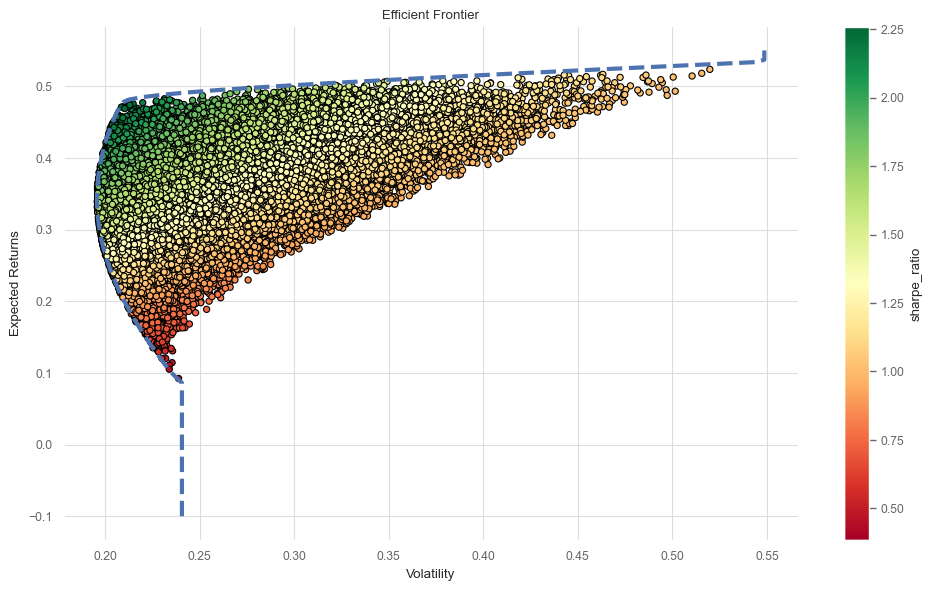

In [345]:
with sns.plotting_context("paper"):
    fig, ax = plt.subplots()
    portf_results_df.plot(
        kind="scatter",
        x="volatility",
        y="returns",
        c="sharpe_ratio",
        cmap="RdYlGn",
        edgecolors="black",
        ax=ax
    )
    ax.plot(vols_range, rtns_range, 'b--', linewidth=3)
    ax.set(
        xlabel="Volatility",
        ylabel="Expected Returns",
        title="Efficient Frontier"
    )

    sns.despine()
    fig.tight_layout()

### 8. Identify the minimum volatility portfolio

In [346]:
min_vol_ind = np.argmin(vols_range)
min_bol_portf_rtn = rtns_range[min_vol_ind]
min_vol_portf_vol = efficient_portfolios[min_vol_ind]["fun"]

min_vol_portf = {
    "Return": min_bol_portf_rtn,
    "Volatility": min_vol_portf_vol,
    "Sharpe Ratio": min_bol_portf_rtn / min_vol_portf_vol
}

min_vol_portf

{'Return': 0.3442211055276382,
 'Volatility': 0.19567702698869072,
 'Sharpe Ratio': 1.759128860576631}

### 9. Print the performance summary

In [347]:
print_portfolio_summary(min_vol_portf,
                        efficient_portfolios[min_vol_ind]["x"],
                        ASSETS,
                        name="Minimum Volatility")

Minimum Volatility portfolio ----
Performance
Return : 34.42% Volatility : 19.57% Sharpe Ratio : 175.91% 
Weights
AMZN : 29.67% META : 9.51% MSFT : 60.82% TSLA : 0.00% 

## There's more

### 1. Define the new objective function (negative Sharpe ratio)

In [348]:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (
        (portf_returns - rf_rate) / portf_volatility
    )
    return -portf_sharpe_ratio

### 2. Find the optimized portfolio

In [350]:
n_assets = len(avg_returns)
RF_RATE = 0

args = (avg_returns, cov_mat, RF_RATE)
constraints = ({'type': 'eq', 
                'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf = sco.minimize(neg_sharpe_ratio,
                                x0=initial_guess,
                                args=args,
                                method='SLSQP',
                                bounds=bounds,
                                constraints=constraints)

### 3. Extract information about the maximum Sharpe Ratio portfolio

In [351]:
max_sharpe_portf_w = max_sharpe_portf["x"]
max_sharpe_portf = {
    "Return" : get_portf_rtn(max_sharpe_portf_w, avg_returns),
    "Volatility" : get_portf_vol(max_sharpe_portf_w, avg_returns, cov_mat),
    "Sharpe Ratio" : -max_sharpe_portf["fun"]
}
max_sharpe_portf

{'Return': 0.4786714909493672,
 'Volatility': 0.20995667582548636,
 'Sharpe Ratio': 2.279858399678768}

### 4. Print performance summary

In [352]:
print_portfolio_summary(max_sharpe_portf,
                        max_sharpe_portf_w,
                        ASSETS,
                        name="Maximum Sharpe Ratio")

Maximum Sharpe Ratio portfolio ----
Performance
Return : 47.87% Volatility : 21.00% Sharpe Ratio : 227.99% 
Weights
AMZN : 0.00% META : 0.00% MSFT : 99.04% TSLA : 0.96% 

# Finding the efficient frontier using convex optimization with `cvxpy`

## How to do it

### 1. Import the library

In [353]:
import cvxpy as cp

### 2. Convert the annualized average returns and the covariance matrix to `numpy`` arrays

In [354]:
avg_returns = avg_returns.values
cov_mat = cov_mat.values

### 3. Set up the optimization problem

In [357]:
weights = cp.Variable(n_assets)
gamma_par = cp.Parameter(nonneg=True)
portf_rtn_cvx = avg_returns @ weights
portf_vol_cvx = cp.quad_form(weights, cov_mat)
objective_function = cp.Maximize(
    portf_rtn_cvx - gamma_par * portf_vol_cvx
)
problem = cp.Problem(
    objective_function,
    [cp.sum(weights) == 1, weights >= 0]
)

### 4. Calculate the Efficient Frontier

In [358]:
N_POINTS = 25
portf_rtn_cvx_ef = []
portf_vol_cvx_ef = []
weights_ef = []
gamma_range = np.logspace(-3, 3, num=N_POINTS)

for gamma in gamma_range:
    gamma_par.value = gamma
    problem.solve()
    portf_vol_cvx_ef.append(cp.sqrt(portf_vol_cvx).value)
    portf_rtn_cvx_ef.append(portf_rtn_cvx.value)
    weights_ef.append(weights.value)

### 5. Plot the allocation for different values of the risk-aversion parameter

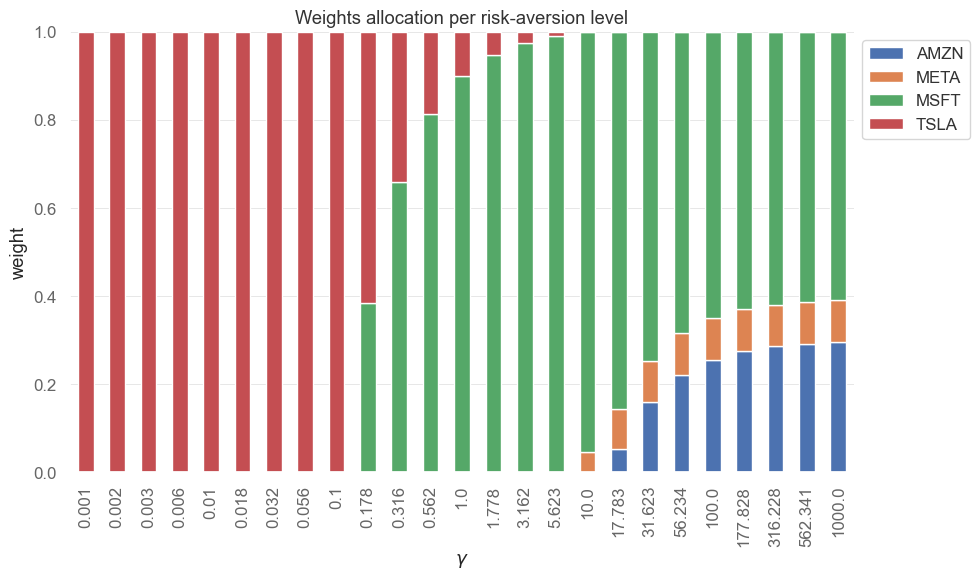

In [359]:
weights_df = pd.DataFrame(weights_ef,
                          columns=ASSETS,
                          index=np.round(gamma_range, 3))
ax = weights_df.plot(kind='bar', stacked=True)
ax.set(title='Weights allocation per risk-aversion level',
       xlabel='$\gamma$',
       ylabel='weight')
ax.legend(bbox_to_anchor=(1, 1))

sns.despine()
plt.tight_layout()

### 6. Plot the Efficient Frontier, together with the individual assets

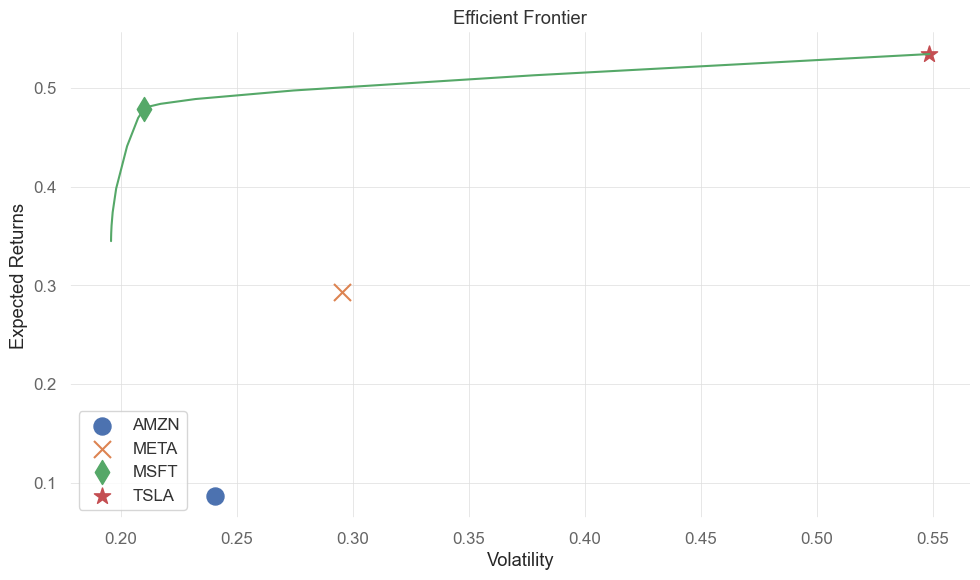

In [360]:
#MARKERS = ["o", "x", "d", "*"]

fig, ax = plt.subplots()
ax.plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, "g-")
for asset_index in range(n_assets):
    plt.scatter(x=np.sqrt(cov_mat[asset_index, asset_index]), 
                y=avg_returns[asset_index],
                marker=MARKERS[asset_index],
                label=ASSETS[asset_index],
                s=150)
ax.set(title="Efficient Frontier",
       xlabel="Volatility",
       ylabel="Expected Returns")
ax.legend()

sns.despine()
plt.tight_layout()

## There's more

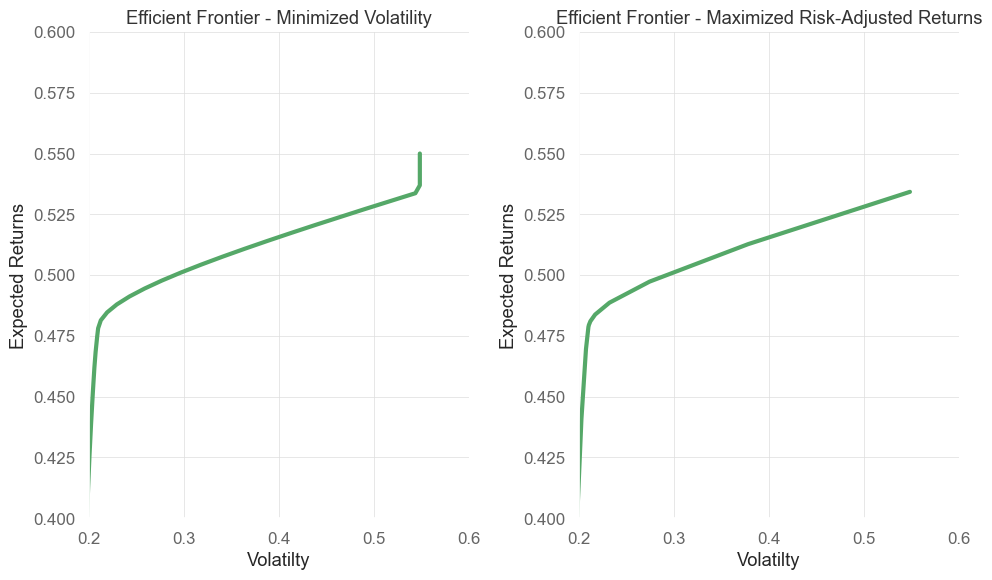

In [361]:
x_lim = [0.2, 0.6]
y_lim = [0.4, 0.6]
fig, ax = plt.subplots(1, 2)
ax[0].plot(vols_range, rtns_range, 'g-', linewidth=3)
ax[0].set(title="Efficient Frontier - Minimized Volatility",
          xlabel="Volatilty",
          ylabel="Expected Returns",
          xlim=x_lim,
          ylim=y_lim)
ax[1].plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, "g-", linewidth=3)
ax[1].set(title="Efficient Frontier - Maximized Risk-Adjusted Returns",
          xlabel="Volatilty",
          ylabel="Expected Returns",
          xlim=x_lim,
          ylim=y_lim)
sns.despine()
plt.tight_layout()

### Allowing for leverage

In [362]:
max_leverage = cp.Parameter()
prob_with_leverage = cp.Problem(
    objective_function,
    [cp.sum(weights) == 1,
     cp.norm(weights, 1) <= max_leverage]
)

In [364]:
LEVERAGE_RANGE = [1, 2, 5]
len_leverage = len(LEVERAGE_RANGE)
N_POINTS = 25

portf_vol_1 = np.zeros((N_POINTS, len_leverage))
portf_rtn_1 = np.zeros((N_POINTS, len_leverage))
weights_ef = np.zeros((len_leverage, N_POINTS, n_assets))

for lev_ind, leverage in enumerate(LEVERAGE_RANGE):
    for gamma_ind in range(N_POINTS):
        max_leverage.value = leverage
        gamma_par.value = gamma_range[gamma_ind]
        prob_with_leverage.solve()
        portf_vol_1[gamma_ind, lev_ind] = cp.sqrt(portf_vol_cvx).value
        portf_rtn_1[gamma_ind, lev_ind] = portf_rtn_cvx.value
        weights_ef[lev_ind, gamma_ind, :] = weights.value

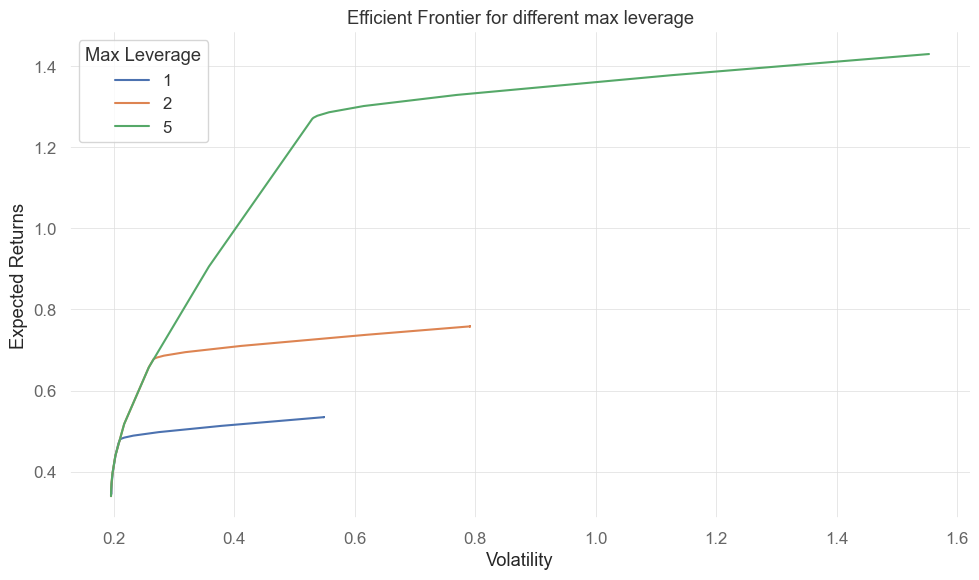

In [366]:
fig, ax = plt.subplots()

for leverage_index, leverage in enumerate(LEVERAGE_RANGE):
    plt.plot(portf_vol_1[:, leverage_index],
             portf_rtn_1[:, leverage_index],
             label=f"{leverage}")

ax.set(title="Efficient Frontier for different max leverage",
       xlabel="Volatility",
       ylabel="Expected Returns")
ax.legend(title="Max Leverage")

sns.despine()
plt.tight_layout()

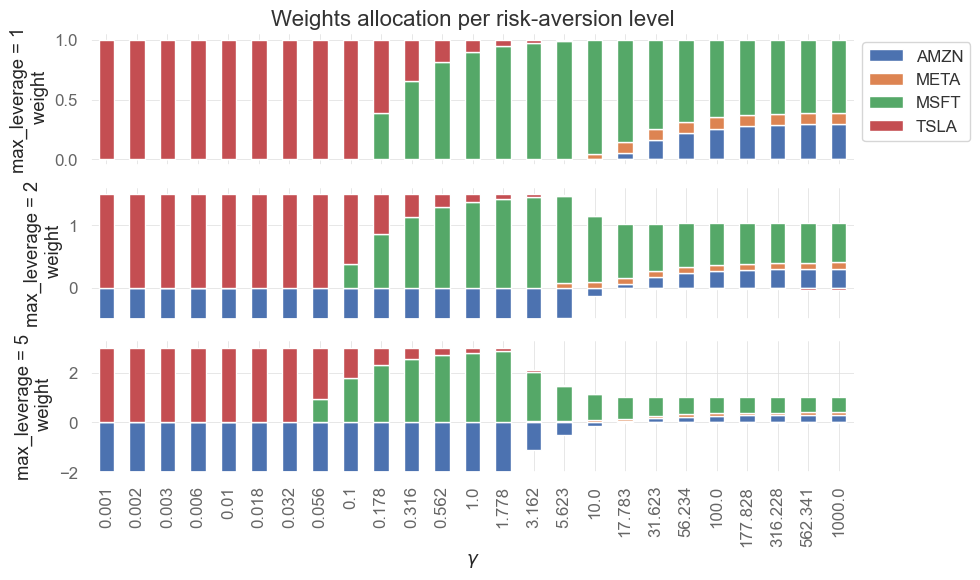

In [368]:
fig, ax = plt.subplots(len_leverage, 1, sharex=True)

for ax_index in range(len_leverage):
    weights_df = pd.DataFrame(weights_ef[ax_index],
                              columns=ASSETS,
                              index=np.round(gamma_range, 3))
    weights_df.plot(kind='bar',
                    stacked=True,
                    ax=ax[ax_index],
                    legend=None)
    ax[ax_index].set(
        ylabel=(f"max_leverage = {LEVERAGE_RANGE[ax_index]}\n weight")
    )

ax[len_leverage - 1].set(xlabel="$\gamma$")
ax[0].legend(bbox_to_anchor=(1, 1))
ax[0].set_title("Weights allocation per risk-aversion level", fontsize=16)

sns.despine()
plt.tight_layout()

# Finding the optimal portfolio with Hierarchical Risk Parity

## How to do it

### 1. Import the libraries

In [369]:
import yfinance as yf
import pandas as pd
from pypfopt.expected_returns import returns_from_prices
from pypfopt.hierarchical_portfolio import HRPOpt
from pypfopt.discrete_allocation import (
    DiscreteAllocation, get_latest_prices
)
from pypfopt import plotting

### 2. Download the stock prices of the biggest US tech companies

In [371]:
ASSETS = ["AAPL", "MSFT", "AMZN", "GOOG", "META", "V", "NVDA", "MA", "PYPL", "NFLX"]

prices_df = yf.download(ASSETS,
                        start="2021-01-01",
                        end="2021-12-31")
prices_df = prices_df["Adj Close"]
prices_df

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,GOOG,MA,META,MSFT,NFLX,NVDA,PYPL,V
Date,,,,,,,,,,
2021-01-04,127.503639,159.331497,86.412003,346.129028,268.940002,212.876648,522.859985,130.862381,231.919998,213.968597
2021-01-05,129.080063,160.925507,87.045998,342.121155,270.970001,213.082001,520.799988,133.768845,234.910004,210.775192
2021-01-06,124.735031,156.919006,86.764503,342.249115,263.309998,207.556931,500.489990,125.882767,226.830002,208.918076
2021-01-07,128.991394,158.108002,89.362503,344.960602,268.739990,213.463379,508.890015,133.162598,235.039993,210.087357
2021-01-08,130.104752,159.134995,90.360497,348.894745,267.570007,214.763992,510.399994,132.491516,242.460007,211.698807
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,174.753922,171.068497,147.142502,356.822205,335.239990,330.033112,614.090027,296.042145,192.009995,214.155914
2021-12-27,178.768845,169.669495,148.063995,356.554993,346.179993,337.685150,613.119995,309.076447,192.009995,215.154434
2021-12-28,177.737839,170.660995,146.447998,357.020111,346.220001,336.501831,610.710022,302.853943,190.100006,215.569656


### 3. Calculate the returns from prices

In [373]:
rtn_df = returns_from_prices(prices_df)
rtn_df.head()

,AAPL,AMZN,GOOG,MA,META,MSFT,NFLX,NVDA,PYPL,V
Date,,,,,,,,,,
2021-01-05,0.012364,0.010004,0.007337,-0.011579,0.007548,0.000965,-0.003940,0.022210,0.012892,-0.014925
2021-01-06,-0.033662,-0.024897,-0.003234,0.000374,-0.028269,-0.025929,-0.038998,-0.058953,-0.034396,-0.008811
2021-01-07,0.034123,0.007577,0.029943,0.007923,0.020622,0.028457,0.016784,0.057830,0.036194,0.005597
2021-01-08,0.008631,0.006496,0.011168,0.011405,-0.004354,0.006093,0.002967,-0.005040,0.031569,0.007670
2021-01-11,-0.023249,-0.021519,-0.022405,-0.015967,-0.040102,-0.009699,-0.022139,0.025966,-0.020457,-0.011882


### 4. Find the optimal allocation using Hierarchical Risk Parity

In [374]:
hrp = HRPOpt(returns=rtn_df)
hrp.optimize()

OrderedDict([('AAPL', 0.13064610872029567),
             ('AMZN', 0.15614849583001472),
             ('GOOG', 0.08532388170557313),
             ('MA', 0.09984426343306761),
             ('META', 0.08111177856655524),
             ('MSFT', 0.10916016590945142),
             ('NFLX', 0.10213810890659998),
             ('NVDA', 0.044328958623678014),
             ('PYPL', 0.05298081086632664),
             ('V', 0.13831742743843756)])

### 5. Display the (cleaned) weights

In [375]:
weights = hrp.clean_weights()
print(weights)

OrderedDict([('AAPL', 0.13065), ('AMZN', 0.15615), ('GOOG', 0.08532), ('MA', 0.09984), ('META', 0.08111), ('MSFT', 0.10916), ('NFLX', 0.10214), ('NVDA', 0.04433), ('PYPL', 0.05298), ('V', 0.13832)])


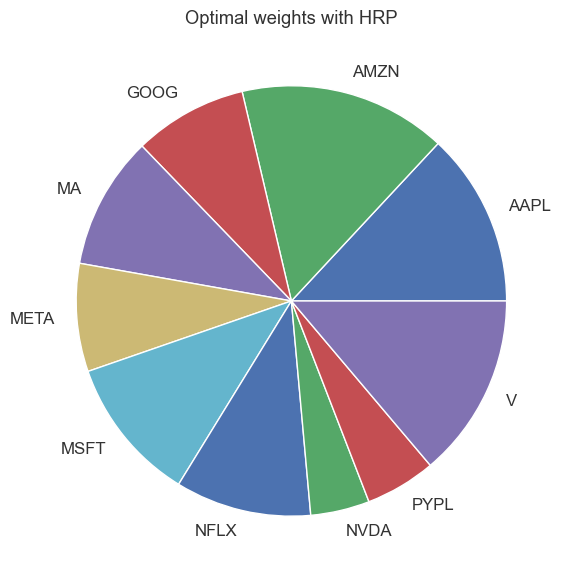

In [376]:
# We can create a simple pie chart to visualize the optimized portfolio weights
pd.Series(weights).plot(kind="pie",
                        title="Optimal weights with HRP")
sns.despine()
plt.tight_layout() 

### 6. Calculate the portfolio performance

In [378]:
hrp.portfolio_performance(verbose=True, risk_free_rate=0)

Expected annual return: 25.2%
Annual volatility: 19.2%
Sharpe Ratio: 1.31


(0.2518586029974341, 0.1919235713863927, 1.3122859332915204)

### 7. Visualize the hierarchical clustering used for finding the portfolio weights

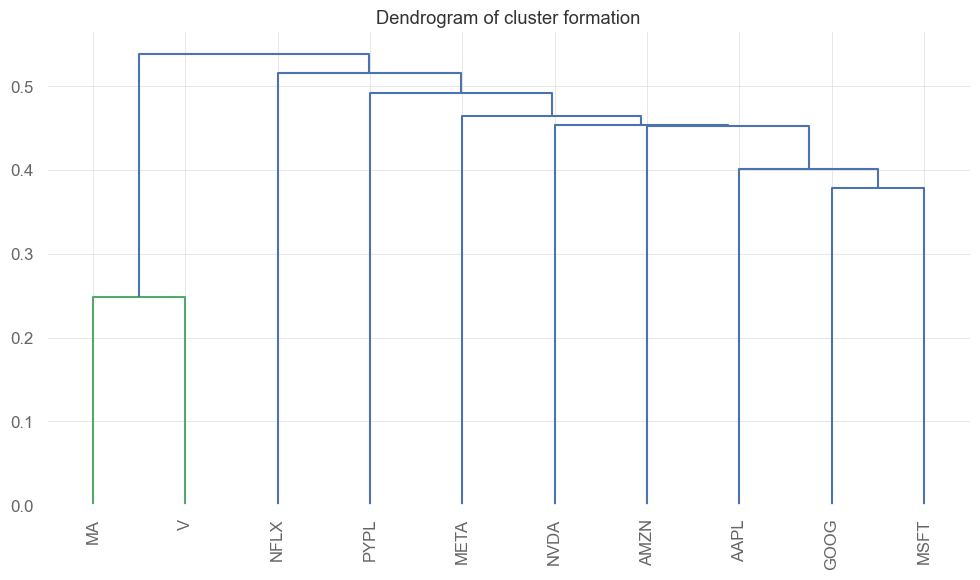

In [379]:
fig, ax = plt.subplots()
plotting.plot_dendrogram(hrp, ax=ax)
ax.set_title("Dendrogram of cluster formation")

sns.despine()
plt.tight_layout()

### 8. Find the number of stocks to buy using 50,000 USD

In [380]:
latest_prices = get_latest_prices(prices_df)
allocation_finder = DiscreteAllocation(
    weights,
    latest_prices,
    total_portfolio_value=50000
)

allocation, leftover = allocation_finder.lp_portfolio()
print(allocation)
print(leftover)

{'AAPL': 37, 'AMZN': 46, 'GOOG': 29, 'MA': 14, 'META': 12, 'MSFT': 16, 'NFLX': 8, 'NVDA': 8, 'PYPL': 14, 'V': 32}
145.2751735711936


/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


## There's more

### 1. Import the libraries

In [381]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier

### 2. Get the expected returns and the covariance matrix

In [382]:
mu = mean_historical_return(prices_df)
S = CovarianceShrinkage(prices_df).ledoit_wolf()

### 3. Find and plot the Efficient Frontier.

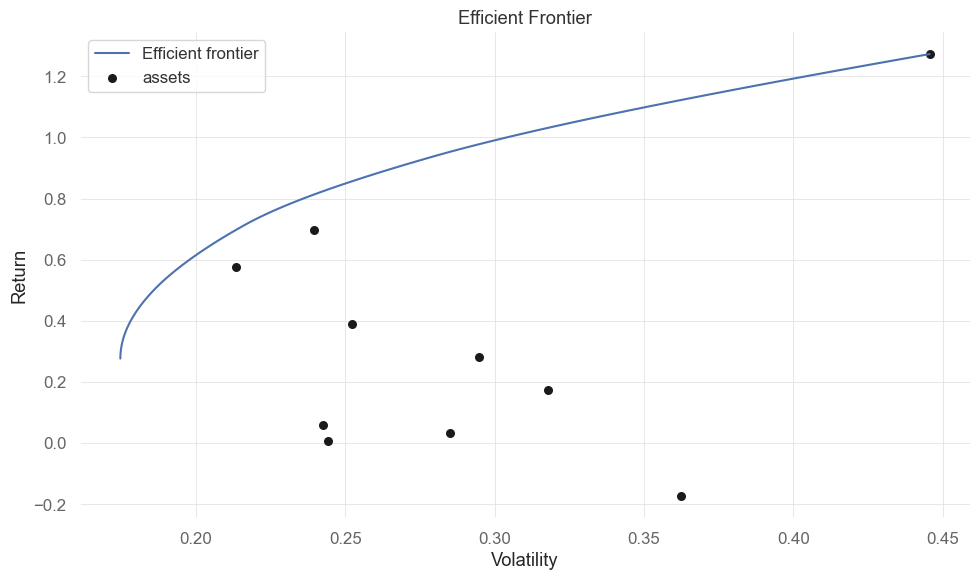

In [383]:
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plot_efficient_frontier(ef, ax=ax, show_assets=True)
ax.set_title("Efficient Frontier")

sns.despine()
plt.tight_layout()

### 4. Identify the tangency portfolio

In [384]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate=0)
print(ef.clean_weights())

OrderedDict([('AAPL', 0.0), ('AMZN', 0.0), ('GOOG', 0.51897), ('MA', 0.0), ('META', 0.0), ('MSFT', 0.19993), ('NFLX', 0.0), ('NVDA', 0.28109), ('PYPL', 0.0), ('V', 0.0)])


In [385]:
ef.portfolio_performance(verbose=True, risk_free_rate=0)

Expected annual return: 83.5%
Annual volatility: 24.6%
Sharpe Ratio: 3.40


(0.8348348152629972, 0.24567384954796936, 3.3981427685488783)

### 5. Add L2 regularization to the portfolio optimization problem

In [386]:
from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.2)

weights = ef.max_sharpe(risk_free_rate=0)
print(ef.clean_weights())

OrderedDict([('AAPL', 0.07334), ('AMZN', 0.0), ('GOOG', 0.29714), ('MA', 0.0), ('META', 0.0), ('MSFT', 0.21838), ('NFLX', 0.0), ('NVDA', 0.41114), ('PYPL', 0.0), ('V', 0.0)])


/Users/woojin/miniforge3/envs/finance/lib/python3.11/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


### 6. Find the tangency portfolio with short-selling allowed

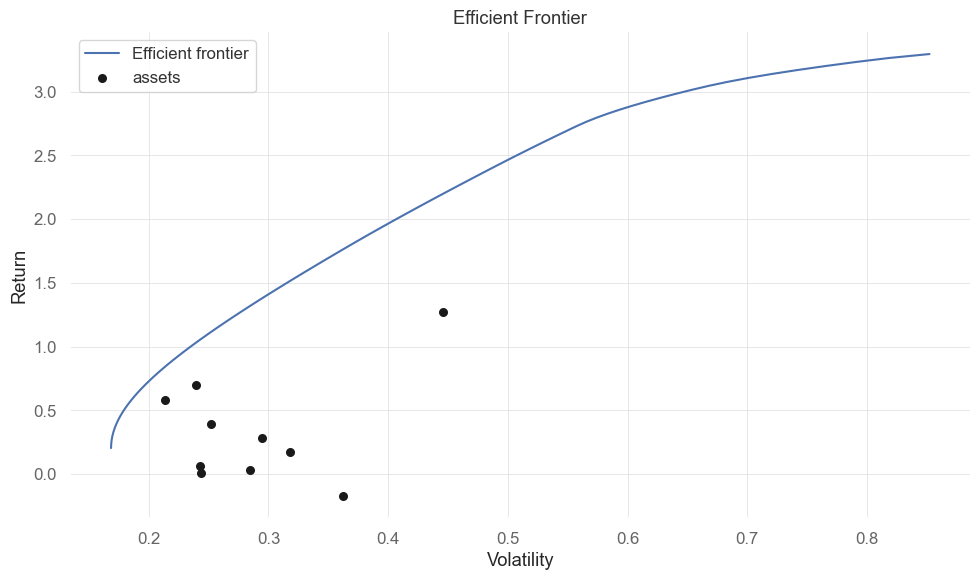

In [387]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))

fig, ax = plt.subplots()
plot_efficient_frontier(ef, ax=ax, show_assets=True)
ax.set_title("Efficient Frontier")

sns.despine()
plt.tight_layout()

In [388]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
weights = ef.max_sharpe(risk_free_rate=0)
print(ef.clean_weights())

OrderedDict([('AAPL', 0.22296), ('AMZN', -0.94318), ('GOOG', 1.0), ('MA', -0.0368), ('META', -0.01186), ('MSFT', 0.92301), ('NFLX', -0.13341), ('NVDA', 0.73156), ('PYPL', -0.78314), ('V', 0.03085)])


In [389]:
ef.portfolio_performance(verbose=True, risk_free_rate=0)

Expected annual return: 230.1%
Annual volatility: 46.6%
Sharpe Ratio: 4.93


(2.3010014158180794, 0.46646924615696184, 4.932804112543397)